In [1]:
import os
import pandas
import numpy as np
import torch
import matplotlib.pyplot as plt
import math
import isingmodellight
from isingmodellight import IsingModelLight
from scipy import stats
import time
import hcpdatautils as hcp

In [2]:
int_type = torch.int
float_type = torch.float
device = torch.device('cuda')

In [3]:
file_dir = 'E:\\Ising_model_results_daai'
other_file_dir = 'D:\\Ising_model_results_daai'

In [4]:
def depytorch(t:torch.Tensor):
    return t.detach().cpu().numpy()

In [6]:
def get_closest_match(values:torch.Tensor, target:float):
    return torch.argmin( torch.abs(values - target) )

In [7]:
plt.rcParams.update({'font.size': 20})
linewidth = 3

In [8]:
num_beta = 101
min_beta = 1e-09
max_beta = 0.025
num_threshold = 31
min_threshold = 0.0
max_threshold = 3.0
threshold = torch.linspace(start=min_threshold, end=3, steps=num_threshold, dtype=float_type, device=device)
blue_thresh = get_closest_match(values=threshold, target=0.0)
green_thresh = get_closest_match(values=threshold, target=1.0)
red_thresh = get_closest_match(values=threshold, target=1.6)
param_string = f'light_group_init_normal_thresholds_{num_threshold}_min_{min_threshold:.3g}_max_{max_threshold:.3g}_betas_101_min_1e-10_max_0.05_steps_1200_lr_0.01_beta_updates_8_v2_test_beta_min_{min_beta:.3g}_max_{max_beta:.3g}_sim_steps_120000'
# param_string = f'light_group_init_uniform_thresholds_{num_threshold}_min_{min_threshold:.3g}_max_{max_threshold:.3g}_betas_101_min_1e-10_max_0.05_steps_1200_lr_0.01_beta_updates_7_test_beta_min_{min_beta:.3g}_max_{max_beta:.3g}_sim_steps_120000'

In [9]:
fc_corr = torch.load( os.path.join(file_dir, f'fc_corr_{param_string}.pt'), weights_only=False )
print( fc_corr.size() )

torch.Size([101, 31])


In [10]:
beta = torch.linspace(start=min_beta, end=max_beta, steps=num_beta, dtype=float_type, device=device)

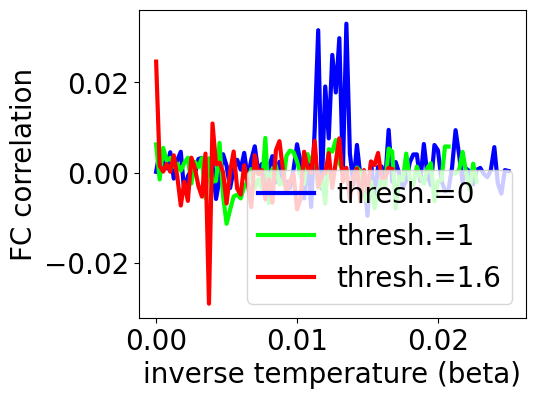

In [17]:
fig, axs = plt.subplots( nrows=1, ncols=1, figsize=(5, 4) )
beta_np = depytorch(beta)
axs.plot( beta_np, depytorch(fc_corr[:,blue_thresh]), color=[0.0, 0.0, 1.0], label=f'thresh.={threshold[blue_thresh]:.3g}', linewidth=linewidth )
axs.plot( beta_np, depytorch(fc_corr[:,green_thresh]), color=[0.0, 1.0, 0.0], label=f'thresh.={threshold[green_thresh]:.3g}', linewidth=linewidth )
axs.plot( beta_np, depytorch(fc_corr[:,red_thresh]), color=[1.0, 0.0, 0.0], label=f'thresh.={threshold[red_thresh]:.3g}', linewidth=linewidth )
axs.set_xlabel('inverse temperature (beta)')
axs.set_ylabel('FC correlation')
# axs.set_ylim([-0.1, 1.1])
axs.legend(loc='lower right')
plt.show()

In [13]:
flip_rate = torch.load( os.path.join(file_dir, f'flip_rate_{param_string}.pt'), weights_only=False )
print( flip_rate.size() )

torch.Size([101, 31, 360])


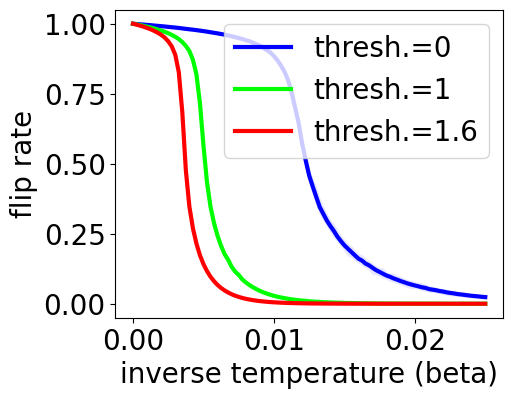

In [18]:
min_flip_rate = flip_rate.min(dim=-1).values
median_flip_rate = flip_rate.median(dim=-1).values
max_flip_rate = flip_rate.max(dim=-1).values
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(5, 4))
beta_np = depytorch(beta)
median_flip_rate_np = depytorch(median_flip_rate)
min_flip_rate_np = depytorch(min_flip_rate)
max_flip_rate_np = depytorch(max_flip_rate)
for thresh, c_triple in zip([blue_thresh, green_thresh, red_thresh], [ [0.0, 0.0, 1.0], [0.0, 1.0, 0.0], [1.0, 0.0, 0.0] ]):
    axs.fill_between( beta_np, min_flip_rate_np[:,thresh], max_flip_rate_np[:,thresh], color=[0.9+0.1*c for c in c_triple])
    axs.plot( beta_np, median_flip_rate_np[:,thresh], color=c_triple, label=f'thresh.={threshold[thresh]:.3g}', linewidth=linewidth )
axs.set_xlabel('inverse temperature (beta)')
axs.set_ylabel('flip rate')
# axs.set_ylim([-0.1, 1.1])
axs.legend(loc='upper right')
plt.show()